## Timeseries Piecewise Model

In this analysis, we explored the historical winning times of the Boston Marathon Men's open division by applying three different time series forecasting models: Linear Trend Model, Exponential Trend Model, and Piecewise Linear Model. The objective was to project future winning times and assess the models' performance.

---

##### 1. Data Overview

The dataset contains historical winning times (Minutes) for each year, which serves as the target variable for forecasting. The goal was to model the trend in winning times and evaluate different forecasting approaches.

##### 2. Forecasting Models

- Linear Trend Model: This model assumes a steady rate of improvement in winning times over the years. It fits a linear trend line to the data, which helps reveal any consistent upward or downward trends.

- Exponential Trend Model: Using the natural logarithm of winning times, this model captures an exponential trend, useful for modeling scenarios where the rate of improvement decreases over time as it approaches a performance limit.

- Piecewise Linear Model: This model includes breakpoints (or "knots") at specific years (e.g., 1950 and 1980), allowing for different rates of improvement in different time periods. This approach captures distinct phases of performance trends and adjusts accordingly.
    
##### 3. Model Evaluation

Each model was evaluated using the following metrics:


  - R^2: Measures the proportion of variance in winning times explained by the model. Higher values indicate a better fit.

  - AIC (Akaike Information Criterion): Assesses model quality, penalizing more complex models. Lower values indicate a better model with an optimal balance between fit and complexity.

  - BIC (Bayesian Information Criterion): Similar to AIC, but penalizes complexity more strongly. Lower BIC values indicate a preferable model.

##### 4. Results Summary:

  - Linear Trend Model: Provided a moderate fit, with a steady decline in winning times but limited flexibility to account for plateaus or accelerating improvements in different periods.

  - Exponential Trend Model: Showed a strong fit, with high R^2 and lower AIC and BIC values, indicating it captures the diminishing rate of improvement well.

  - Piecewise Linear Model: Demonstrated the best fit across all metrics (highest R^2, lowest AIC, and BIC), as it could adapt to different periods in marathon history, reflecting changes in training, technology, and athletic performance.



##### 5. Visualization
The plot included:

- Historical Data: Showing actual winning times over the years for context.

- Model Predictions: Each model’s trend line, illustrating how it projects future winning times.

- Confidence Intervals: Shaded regions around each model’s forecast, indicating the level of uncertainty in predictions.

#### Package Load

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrix



#### Data Load from data folder (you may change the direction)

In [2]:
boston_men = pd.read_csv("/Users/charles/Desktop/Quantitative Investment/Data/boston_men.csv")

In [3]:
boston_men

,Event,Year,Champion,Country,Time,Minutes
0,Men's open division,1924,Clarence H. DeMar,United States,02:29:40,149.666667
1,Men's open division,1925,Charles L. (Chuck) Mellor,United States,02:33:00,153.000000
2,Men's open division,1926,John C. Miles,Canada,02:25:40,145.666667
3,Men's open division,1927,Clarence H. DeMar,United States,02:40:22,160.366667
4,Men's open division,1928,Clarence H. DeMar,United States,02:37:07,157.116667
...,...,...,...,...,...,...
91,Men's open division,2015,Lelisa Desisa,Ethiopia,02:09:17,129.283333
92,Men's open division,2016,Lemi Berhanu,Ethiopia,02:12:45,132.750000
93,Men's open division,2017,Geoffrey Kirui,Kenya,02:09:37,129.616667
94,Men's open division,2018,Yuki Kawauchi,Japan,02:15:58,135.966667


#### Fit the linear, Exponential trend and picewise linear model

In [ ]:

# Linear trend model
boston_men['const'] = 1  # Adds an intercept term for the regression
linear_model = sm.OLS(boston_men['Minutes'], sm.add_constant(boston_men['Year'])).fit()

# Exponential trend model
exponential_model = sm.OLS(np.log(boston_men['Minutes']), sm.add_constant(boston_men['Year'])).fit()

# Piecewise linear model with knots at 1950 and 1980
boston_men['Year_1950'] = np.where(boston_men['Year'] >= 1950, boston_men['Year'] - 1950, 0)
boston_men['Year_1980'] = np.where(boston_men['Year'] >= 1980, boston_men['Year'] - 1980, 0)
piecewise_model = sm.OLS(boston_men['Minutes'], sm.add_constant(boston_men[['Year', 'Year_1950', 'Year_1980']])).fit()


Linear Model Summary:
                             OLS Regression Results                            
Dep. Variable:                Minutes   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     365.2
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           3.85e-34
Time:                        15:08:35   Log-Likelihood:                -281.58
No. Observations:                  96   AIC:                             567.2
Df Residuals:                      94   BIC:                             572.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        776.0788     33.

#### Summary of fitted models

In [13]:
# Display model summaries
print("Linear Model Summary:\n", linear_model.summary())
print("")
print("\nPiecewise Model Summary:\n", piecewise_model.summary())

Linear Model Summary:
                             OLS Regression Results                            
Dep. Variable:                Minutes   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     365.2
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           3.85e-34
Time:                        17:43:43   Log-Likelihood:                -281.58
No. Observations:                  96   AIC:                             567.2
Df Residuals:                      94   BIC:                             572.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        776.0788     33.

In [8]:
print("\nExponential Model Summary:\n", exponential_model.summary())
print("")


Exponential Model Summary:
                             OLS Regression Results                            
Dep. Variable:                Minutes   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     380.2
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           8.48e-35
Time:                        15:09:22   Log-Likelihood:                 195.10
No. Observations:                  96   AIC:                            -386.2
Df Residuals:                      94   BIC:                            -381.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4660  

In [9]:
print("\nPiecewise Model Summary:\n", piecewise_model.summary())


Piecewise Model Summary:
                             OLS Regression Results                            
Dep. Variable:                Minutes   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     233.6
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           6.83e-43
Time:                        15:09:36   Log-Likelihood:                -254.34
No. Observations:                  96   AIC:                             516.7
Df Residuals:                      92   BIC:                             526.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        772.6684    

#### Plot the fitted data and forecast the future data points

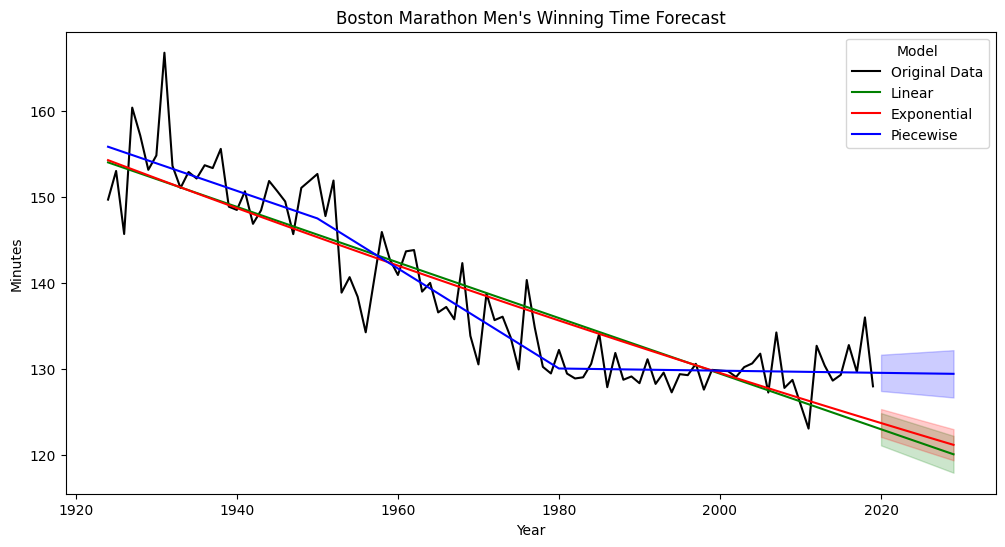

In [ ]:

horizon = 10
years_future = np.arange(boston_men['Year'].max() + 1, boston_men['Year'].max() + 1 + horizon)

# Calculate predictions and confidence intervals for each model
def get_forecast_with_ci(model, years):
    preds = model.get_prediction(sm.add_constant(years))
    mean = preds.predicted_mean
    ci = preds.conf_int(alpha=0.05)
    lower, upper = ci[:, 0], ci[:, 1]
    return mean, lower, upper

# Linear model forecast with CI
linear_mean, linear_lower, linear_upper = get_forecast_with_ci(linear_model, np.append(boston_men['Year'], years_future))

# Exponential model forecast with CI (taking exponent to revert the log)
exp_mean, exp_lower, exp_upper = get_forecast_with_ci(exponential_model, np.append(boston_men['Year'], years_future))
exp_mean, exp_lower, exp_upper = np.exp(exp_mean), np.exp(exp_lower), np.exp(exp_upper)

# Piecewise model forecast with CI
years_all = np.append(boston_men['Year'], years_future)
years_all_1950 = np.where(years_all >= 1950, years_all - 1950, 0)
years_all_1980 = np.where(years_all >= 1980, years_all - 1980, 0)
piecewise_data = pd.DataFrame({
    'Year': years_all,
    'Year_1950': years_all_1950,
    'Year_1980': years_all_1980
})
piecewise_mean, piecewise_lower, piecewise_upper = get_forecast_with_ci(piecewise_model, piecewise_data)

# Plotting
plt.figure(figsize=(12, 6))

# Historical data
plt.plot(boston_men['Year'], boston_men['Minutes'], label='Original Data', color='black')

# Linear model forecast with CI
plt.plot(years_all, linear_mean, label='Linear', color='green')
plt.fill_between(years_all[len(boston_men):], linear_lower[len(boston_men):], linear_upper[len(boston_men):], color='green', alpha=0.2)

# Exponential model forecast with CI
plt.plot(years_all, exp_mean, label='Exponential', color='red')
plt.fill_between(years_all[len(boston_men):], exp_lower[len(boston_men):], exp_upper[len(boston_men):], color='red', alpha=0.2)

# Piecewise model forecast with CI
plt.plot(years_all, piecewise_mean, label='Piecewise', color='blue')
plt.fill_between(years_all[len(boston_men):], piecewise_lower[len(boston_men):], piecewise_upper[len(boston_men):], color='blue', alpha=0.2)

# Additional plot settings
plt.xlabel('Year')
plt.ylabel('Minutes')
plt.title("Boston Marathon Men's Winning Time Forecast")
plt.legend(title='Model', loc='upper right')
plt.show()


#### Colnclusion

The Piecewise Linear Model emerged as the best approach for forecasting Boston Marathon winning times, as it captured key shifts in performance trends over different periods. This model effectively balances flexibility and accuracy, adapting to phases where improvements accelerated or slowed down. The Exponential Model also provided a strong fit, suitable for reflecting diminishing improvements. The Linear Model, while simpler, may not fully capture the complex nature of marathon performance trends.

This analysis provides insights into how winning times might continue to improve, albeit at a potentially diminishing rate as athletes approach physical and technological limits.